In [ ]:
#Description: This program attempts to predict the future price of SOL

In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#Load the XRP data
from google.colab import files
files.upload()

Saving SOL.csv to SOL.csv


{'SOL.csv': b'Date,Open,High,Low,Close,Adj Close,Volume\n2020-11-14,2.020792,2.033491,1.875279,1.917016,1.917016,8134593\n2020-11-15,1.917016,2.209059,1.916848,2.043234,2.043234,18621333\n2020-11-16,2.043234,2.360211,1.994853,2.255355,2.255355,22156135\n2020-11-17,2.281080,2.318186,2.132590,2.202181,2.202181,17074175\n2020-11-18,2.202181,2.205922,2.012693,2.115029,2.115029,14629648\n2020-11-19,2.115029,2.175022,2.018166,2.076769,2.076769,10155987\n2020-11-20,2.076769,2.230391,2.056972,2.095392,2.095392,11113990\n2020-11-21,2.095392,2.498828,2.048524,2.382205,2.382205,20288343\n2020-11-22,2.382205,2.403821,2.053938,2.144845,2.144845,16416065\n2020-11-23,2.144845,2.351599,2.120315,2.276377,2.276377,15487339\n2020-11-24,2.277241,2.466384,2.143795,2.267967,2.267967,25036626\n2020-11-25,2.269485,2.477587,2.182777,2.270034,2.270034,24870951\n2020-11-26,2.266534,2.291702,1.741493,1.903037,1.903037,33038223\n2020-11-27,1.903335,1.970653,1.780363,1.857949,1.857949,13307808\n2020-11-28,1.859825,

In [ ]:
#Read the data
df =pd.read_csv('SOL.csv')
#Set the date as the index
df = df.set_index( pd.DatetimeIndex(df['Date'].values))
#Show thw data
df

,Date,Open,High,Low,Close,Adj Close,Volume
2020-11-14,2020-11-14,2.020792,2.033491,1.875279,1.917016,1.917016,8134593
2020-11-15,2020-11-15,1.917016,2.209059,1.916848,2.043234,2.043234,18621333
2020-11-16,2020-11-16,2.043234,2.360211,1.994853,2.255355,2.255355,22156135
2020-11-17,2020-11-17,2.281080,2.318186,2.132590,2.202181,2.202181,17074175
2020-11-18,2020-11-18,2.202181,2.205922,2.012693,2.115029,2.115029,14629648
...,...,...,...,...,...,...,...
2021-11-09,2021-11-09,248.356842,253.179825,237.895294,239.213135,239.213135,2819309492
2021-11-10,2021-11-10,239.133743,247.947037,218.388550,233.779526,233.779526,3873202098
2021-11-11,2021-11-11,233.913986,246.447189,229.748520,234.240753,234.240753,2693456862
2021-11-12,2021-11-12,233.721268,238.695679,221.252945,228.502090,228.502090,3022054714


In [ ]:
future_days =10

In [ ]:
#Create a new column 
df[str(future_days)+'_Day_Price_Forecast'] = df[['Close']].shift(-future_days)
#Show the data
df[['Close', str(future_days)+'_Day_Price_Forecast']]

,Close,10_Day_Price_Forecast
2020-11-14,1.917016,2.267967
2020-11-15,2.043234,2.270034
2020-11-16,2.255355,1.903037
2020-11-17,2.202181,1.857949
2020-11-18,2.115029,1.888935
...,...,...
2021-11-09,239.213135,NaN
2021-11-10,233.779526,NaN
2021-11-11,234.240753,NaN
2021-11-12,228.502090,NaN


In [ ]:
X = np.array(df[['Close']])
X = X[:df.shape[0] - future_days]
print(X)

[[  1.917016]
 [  2.043234]
 [  2.255355]
 [  2.202181]
 [  2.115029]
 [  2.076769]
 [  2.095392]
 [  2.382205]
 [  2.144845]
 [  2.276377]
 [  2.267967]
 [  2.270034]
 [  1.903037]
 [  1.857949]
 [  1.888935]
 [  1.915155]
 [  1.966891]
 [  1.976308]
 [  2.115401]
 [  2.100371]
 [  1.855953]
 [  1.978774]
 [  1.854249]
 [  1.831173]
 [  1.665352]
 [  1.662304]
 [  1.574151]
 [  1.444585]
 [  1.490912]
 [  1.565456]
 [  1.591646]
 [  1.760671]
 [  1.783598]
 [  1.678634]
 [  1.6988  ]
 [  1.668651]
 [  1.563576]
 [  1.541915]
 [  1.490286]
 [  1.205692]
 [  1.362408]
 [  1.445403]
 [  1.324238]
 [  1.303042]
 [  1.515685]
 [  1.674345]
 [  1.535457]
 [  1.510898]
 [  1.842084]
 [  1.799275]
 [  2.161752]
 [  2.485097]
 [  2.157217]
 [  1.929217]
 [  2.372745]
 [  3.219887]
 [  3.385382]
 [  3.466111]
 [  3.10809 ]
 [  3.613398]
 [  3.513782]
 [  3.278164]
 [  3.250161]
 [  3.447055]
 [  3.818139]
 [  3.795515]
 [  3.641866]
 [  3.723578]
 [  2.990536]
 [  3.346229]
 [  3.504112]
 [  3.

In [ ]:
Y = np.array(df[str(future_days)+'_Day_Price_Forecast'])
Y = Y[:-future_days]
print(Y)

[  2.267967   2.270034   1.903037   1.857949   1.888935   1.915155
   1.966891   1.976308   2.115401   2.100371   1.855953   1.978774
   1.854249   1.831173   1.665352   1.662304   1.574151   1.444585
   1.490912   1.565456   1.591646   1.760671   1.783598   1.678634
   1.6988     1.668651   1.563576   1.541915   1.490286   1.205692
   1.362408   1.445403   1.324238   1.303042   1.515685   1.674345
   1.535457   1.510898   1.842084   1.799275   2.161752   2.485097
   2.157217   1.929217   2.372745   3.219887   3.385382   3.466111
   3.10809    3.613398   3.513782   3.278164   3.250161   3.447055
   3.818139   3.795515   3.641866   3.723578   2.990536   3.346229
   3.504112   3.634411   3.699981   4.04735    3.690587   3.836474
   3.834676   4.224276   4.264144   4.611602   5.267508   5.71599
   6.426065   6.68172    6.110807   6.700463   7.88325    7.816793
   9.072214   9.215352   9.247012   8.732455   8.738896   8.861739
   8.297867   8.222577   8.980452  11.465653  10.002664  11.085

In [ ]:
#Split the Data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2)

In [ ]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=1e3, gamma =0.0001)
svr_rbf.fit(X_train, Y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.0001,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
#To check the accuracy of the model
svr_rbf_confidence = svr_rbf.score(X_test, Y_test)
print('svr_rbf accuracy:', svr_rbf_confidence)

svr_rbf accuracy: 0.9464638658708858


In [ ]:
#Predicting the price
svm_prediction = svr_rbf.predict(X_test)
print(svm_prediction)

[ 83.99059757  45.79870455   2.3658977  161.8558284   34.92384623
  15.76174651   6.34115731  51.42584364  26.34155249  48.10951401
   4.24402439   2.05670917 165.48565044   4.63403408  47.07569934
 216.11226761  46.65443796   2.29068819  28.19659648   2.92736908
  14.74896236   2.20330348  50.5454875  180.24923729  20.51834811
   9.1720627    3.67556593  29.84709599   4.1479801    1.96511556
 164.32650349  16.37969906   2.444337   162.20137486   2.42969513
 159.97038018  23.92250177 148.12665232  45.72063167  25.43268293
  26.79209475   2.33353389  16.83442041  19.47779589 163.32098238
  35.83885948  35.38330238  42.38740272  36.64969701   2.79935888
  34.32127612   1.78186324 162.39990273  21.22568786  46.32505239
  34.42762718 160.98931641  30.27069837 160.78345822  35.40556825
  49.2034033  223.97254699 159.78413189  51.18799046  14.64585634
 106.21782909 112.59553627  32.6497884   47.708935     1.87054434
   4.68020033]


In [ ]:
print(Y_test)

[ 75.316208  28.698862   1.662304 159.117386  41.098675  16.508322
   9.247012  75.708038  25.397366  42.717865   3.723578   1.6988
 141.069046   3.836474  35.353436 203.54509   73.75621    1.783598
  27.815411   3.818139  14.846311   1.324238  35.107182 123.950394
  27.93189   11.465653   4.264144  37.355137   3.641866   1.362408
 156.825836  14.204796   1.760671 148.048706   1.574151 172.589157
  27.435553 191.041397  72.803917  26.475111  43.976517   1.665352
  14.204831  26.478081 162.596207  42.308376  26.751909  31.181034
  41.744114   1.855953  44.825985   1.541915 210.104294  28.512123
  36.648796  38.767784 190.318436  32.984589 157.231277  41.099361
  47.200829 236.474335 135.699371  28.602659  14.508266  94.469673
 128.102386  27.702082  44.330196   2.372745   7.88325 ]


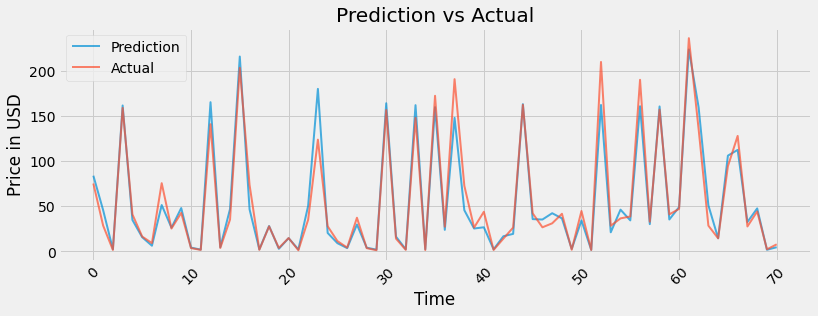

In [ ]:
#Visualizing the Predicted Data
plt.figure(figsize=(12,4))
plt.plot(svm_prediction, label='Prediction', lw=2, alpha =.7)
plt.plot(Y_test, label='Actual', lw=2, alpha=.7)
plt.title('Prediction vs Actual')
plt.ylabel('Price in USD')
plt.xlabel('Time')
plt.legend()
plt.xticks(rotation=45)
plt.show()
